In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t))
    x[1]=x0
    for i=1:length(t)-1
        x0=x0-(x0*γ*Δt)+(sqrt(2*Δt)*randn())
        @inbounds x[1+i]=x0
    end
    return x
end

OUH (generic function with 1 method)

  4.678698 seconds (11.12 M allocations: 554.281 MiB, 3.27% gc time)


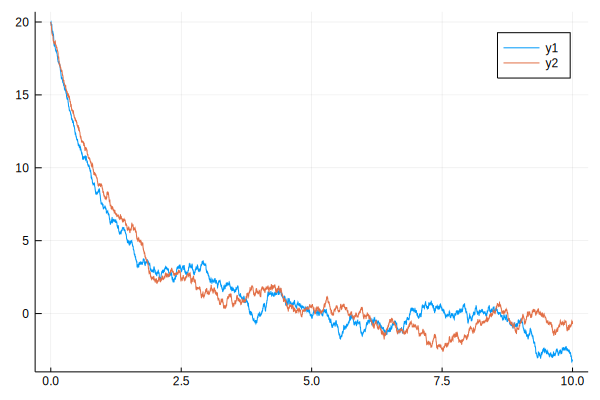

In [3]:
@time begin
    Δt=0.001
    N=10.0
    x0=20.0
    γ=1.0
    t=0:Δt:N
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt);
    plot(t,K)
    plot!(t,T)
end

In [4]:
i=100
Δs=Δt
R=diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2


3×3 Array{Float64,2}:
  0.999837      0.0180391  0.000165715
 -0.0180391     0.999669   0.0183729  
  0.000165715  -0.0183729  0.999831   

In [5]:
function eigen2(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    eigen(R)
end

eigen2 (generic function with 1 method)

In [6]:
@time begin
    γ=1.0
    x0=0.0
    Δt=0.1
    N=12
    t=0:Δt:N
    Δs=Δt
    K=OUH(x0,γ,t,Δt)
    T=OUH(x0,γ,t,Δt)
    F=eigen2(length(t),K,T,Δs)
end

  0.695039 seconds (1.83 M allocations: 91.006 MiB, 3.33% gc time)


Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
3-element Array{Complex{Float64},1}:
 0.17411014745033532 - 0.9876384111346076im
 0.17411014745033532 + 0.9876384111346076im
  1.0036697036904687 + 0.0im               
eigenvectors:
3×3 Array{Complex{Float64},2}:
   0.68095-0.0im         0.68095+0.0im       0.269947+0.0im
 -0.130066-0.517678im  -0.130066+0.517678im  0.656325+0.0im
 -0.139949+0.481472im  -0.139949-0.481472im  0.704533+0.0im

In [7]:
function lam_eigenvals(γ::Float64,x0::Float64,Δt::Float64,t::AbstractArray,Δs::Float64,tiradas::Int64)
    λ=Vector{Complex{Float64}}(undef,3*tiradas)
    for i=1:tiradas
        K=OUH(x0,γ,t,Δt)
        T=OUH(x0,γ,t,Δt)
        a=eigen2(length(t),K,T,Δs).values
        @inbounds λ[3*i-2]=a[1]
        @inbounds λ[3*i-1]=a[2]
        @inbounds λ[3*i-0]=a[3]
    end
    return λ
end

lam_eigenvals (generic function with 1 method)

In [17]:
γ=1.0
tiradas=500
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
step=10 #Para animar
length(1:step:length(t))


201

In [18]:
@time λ=lam_eigenvals(γ,x0,Δt,t,Δs,tiradas);

  3.912394 seconds (63.05 M allocations: 3.014 GiB, 9.39% gc time)


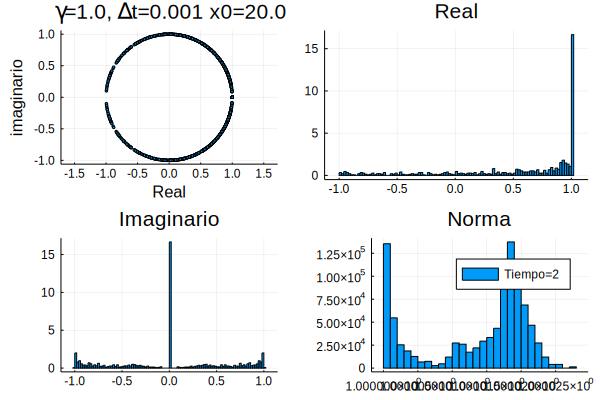

In [19]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)")
Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")
plot(Q1,Q2,Q3,Q4,layout=l)

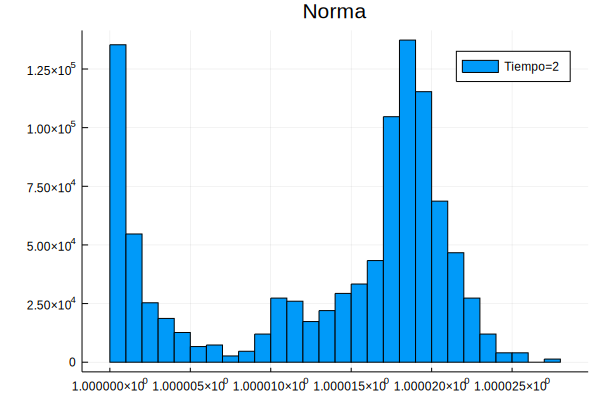

In [20]:
histogram(abs.(λ),normalized=true,bins=40,label="Tiempo=$(N)",title="Norma")

410.886188 seconds (6.37 G allocations: 304.442 GiB, 9.17% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\Animacion_Prueba_3D_1.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\Animacion_Prueba_3D_1.gif")
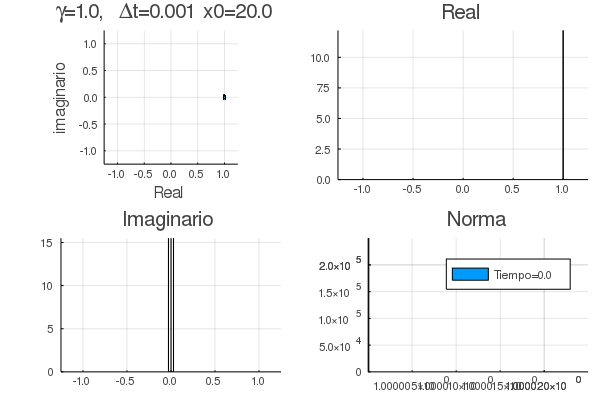

In [21]:
@time begin    
    anim= @animate for j=1:step:length(t)
        λ=lam_eigenvals(γ,x0,Δt,t[1:j],Δs,tiradas);
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.25,1.25),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) x0=$(x0)",xlims=(-1.25,1.25),ylims=(-1.25,1.25))
        Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1,1.000025),ylims=(0,2.5e5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_3D_1.gif", fps=120)
end

In [22]:
function Mat(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δs::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)+(0.5*diagm(1 => [K[i],T[i]]*Δs,-1 => -[K[i],T[i]]*Δs)^2))*R
    end
    R
end

Mat (generic function with 1 method)

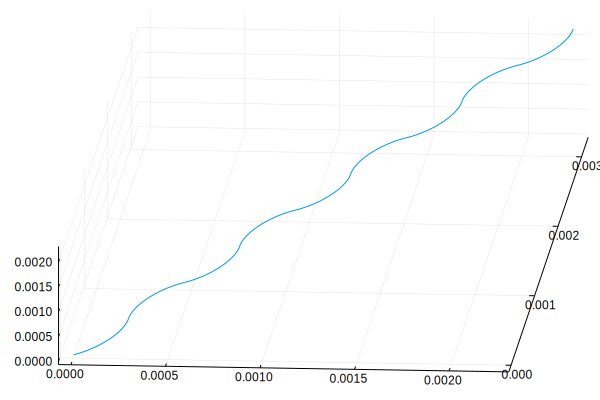

In [90]:
γ=1.0
x0=20.0
Δt=0.001
N=2
t=0:Δt:N
Δs=Δt
#K=OUH(x0,γ,t,Δt);
#T=OUH(x0,γ,t,Δt)
T=ones(2001)*5
K=ones(2001)*5

T_v0=(eigen2(2,K,T,Δs).vectors)[:,1]
N_v0=(eigen2(2,K,T,Δs).vectors)[:,2]*im
B_v0=(eigen2(2,K,T,Δs).vectors)[:,3]

T_v=Array{Float64,1}[]
N_v=Array{Float64,1}[]
B_v=Array{Float64,1}[]

for i=1:length(t)
    T_v1=Mat(i,K,T,Δs)*T_v0
    N_v1=Mat(i,K,T,Δs)*N_v0
    B_v1=Mat(i,K,T,Δs)*B_v0
    push!(T_v,real(T_v1))
    push!(N_v,real(N_v1))
    push!(B_v,real(B_v1))
end
T_v=transpose(hcat(T_v...))
N_v=transpose(hcat(N_v...))
B_v=transpose(hcat(B_v...))

Tx=T_v[:,1]
Ty=T_v[:,2]
Tz=T_v[:,3]

rx=Float64[]
ry=Float64[]
rz=Float64[]

r1x=0.0
r1y=0.0
r1z=0.0

for i=1:length(t)-1
    r1x=(abs(Tx[i]-Tx[i+1])/2)*Δs+r1x
    r1y=(abs(Ty[i]-Ty[i+1])/2)*Δs+r1y
    r1z=(abs(Tz[i]-Tz[i+1])/2)*Δs+r1z
    push!(rx,r1x)
    push!(ry,r1y)
    push!(rz,r1z)
end
plot(rx,ry,rz,legend=false,camera=(10,70))

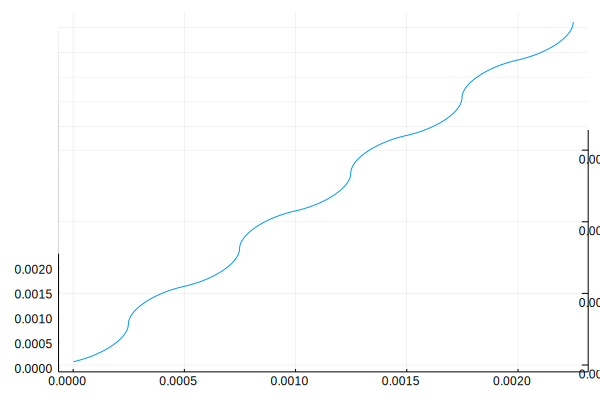

In [92]:
plot(rx,ry,rz,legend=false,camera=(0,70),lw=1)

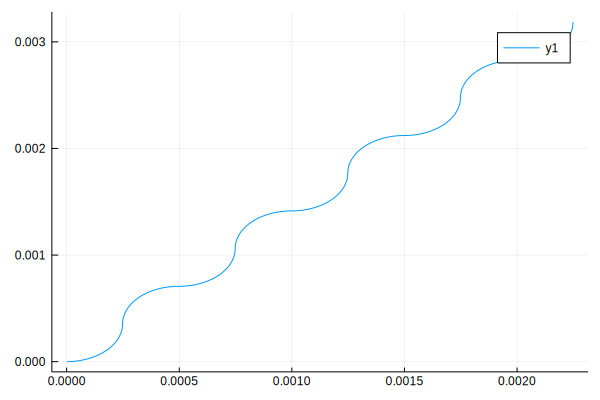

In [93]:
plot(rx,ry)

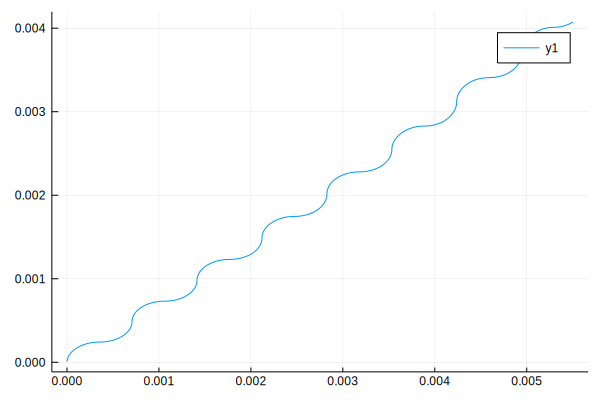

In [51]:
plot(ry,rz)

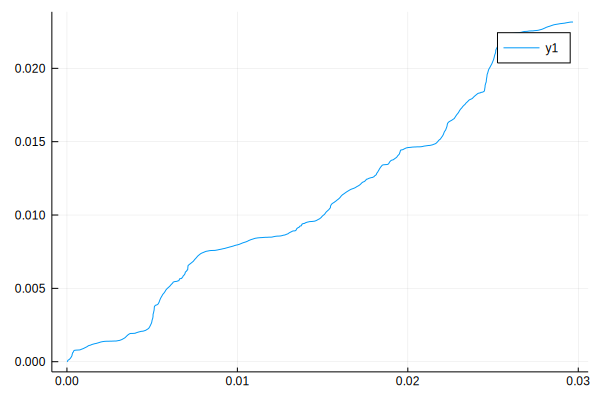

In [43]:
plot(rx,rz)

In [88]:
K

2001-element Array{Float64,1}:
 20.0               
 20.016408994057503 
 20.069918075952227 
 20.016909692983134 
 19.952710179068742 
 19.88623210890366  
 19.941893769931404 
 19.923441296873595 
 19.836226478637258 
 19.820358450730172 
 19.760845942751704 
 19.74507212846541  
 19.77674612245051  
  ⋮                 
  4.593994992956767 
  4.60939516608795  
  4.6431125429810205
  4.719999626168181 
  4.745612856765876 
  4.667361565851892 
  4.708910168174117 
  4.755059989397295 
  4.636296974534931 
  4.649523423547076 
  4.688178997938635 
  4.683882859263547 

1.1102230246251565e-16 + 1.9820597284167557e-13im